<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


<h2>Convolutional Neural Networks with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build convolutional neural networks.</h5>
<h5> 2. Convolutional Neural Network with One Convolutional and Pooling Layers.</h5>
<h5> 3. Convolutional Neural Network with Two Convolutional and Pooling Layers.</h5>



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.


In [5]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

<a id='item42'></a>


## Convolutional Layer with One set of convolutional and pooling layers


In [6]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1


In [7]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

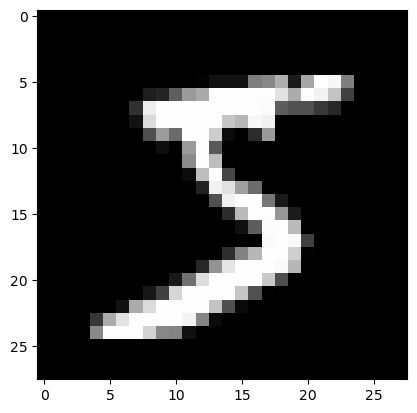

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

Next, let's convert the target variable into binary categories


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.


In [13]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.


In [ ]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


2023-10-11 17:48:49.771086: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-10-11 17:48:49.786050: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394310000 Hz
2023-10-11 17:48:49.803011: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ff0ea59af0 executing computations on platform Host. Devices:
2023-10-11 17:48:49.803226: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-10-11 17:48:50.286535: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

------------------------------------------


<a id='item43'></a>


## Convolutional Layer with two sets of convolutional and pooling layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [ ]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [ ]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week4_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01).
